# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [44]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

student_id = [num for num in range(1,11)]
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({"StudentID":student_id, "Age":age, "Tardies":tardies}).set_index(["StudentID"])
display(student_data)

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

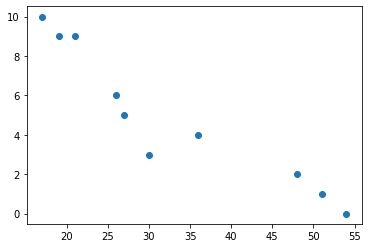

In [45]:
plt.scatter(x=student_data["Age"], y=student_data["Tardies"])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [46]:
# Yes, it really seems that the younger u are, more times u get late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [47]:
#correlation:
corr = student_data["Age"].corr(student_data["Tardies"])
print(corr)

"""
They have high negative Corr (non-linear), which is obvious on the ScatterPlot: 1 variable grows(Age), other decreases(Tardies)

"""


#covariance:
cov = student_data[["Age", "Tardies"]].cov() # this show the COV for each combination
display(cov)

#cov = student_data['Age'].cov(student_data['Tardies']) # this shows just the combination between this 2

"""
Cov describes the direction of the Linear Corr between both variables.
So, the higher the value of Cov (negative or positive), the higher the Linear Corr between both variables

"""

-0.9391626886887122


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


'\nCov describes the direction of the Linear Corr between both variables.\nSo, the higher the value of Cov (negative or positive), the higher the Linear Corr between both variables\n\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [48]:
x = student_data["Age"]
y = student_data["Tardies"]

results = stats.linregress(x,y)
print("linear regression:", results)
print("\n")


regression_line = results.intercept + results.slope*x 
print(regression_line)


rsquared = results.rvalue**2
print("\nrsquared:", rsquared)

linear regression: LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)


StudentID
1     8.760850
2     0.504944
3     6.332643
4     7.789567
5     4.147256
6     1.233406
7     8.275209
8     6.575463
9    -0.223518
10    5.604180
Name: Age, dtype: float64

rsquared: 0.8820265558250108


Plot your regression model on your scatter plot.

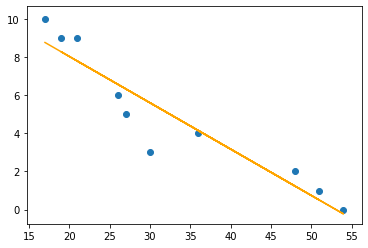

In [49]:
plt.plot(x, regression_line, c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [50]:
# In this case, Age clearly seems to be a great predictor of tardiness.
# I mean, the regression_line fits well on the correlation and the R^2 its pretty high

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [61]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

vehicles = pd.read_csv(r"C:\Users\HP\Documents\IronHack\Bootcamp\IronHackLessons\Week4\LAB Regression Analysis\your-code\vehicles.csv")
display(vehicles.head(2))

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [43]:
vehicles_corr = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]].corr()
display(vehicles_corr)

# Without counting the outcome variable (CO2 Emission):
#    - highest Corr: Fuel Cost/Year & Fuel Barrels/Year (maybe the most important to determine CO2 Emissions) and Fuel Cost/year & Cylinders
#    - lowest Corr: Combined MPG & Fuel Barrels/Year (myabe the least helpful)

# Counting the outcome variable:
#   - highest Corr: CO2 Emission & Fuel Barrels/Year
#   - lowest Corr: CO2 Emission & Combined MPG

# Seems clear that the Fuel Barrels/Year its the most important variable to determine/predict the CO2 Emissions. 
# Also, intuitively speaking, it makes sense that the amount of Fuel used, will influence the CO2 Emissions.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [64]:
data = MinMaxScaler().fit_transform(vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]])


x = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

x = sm.add_constant(x)

# 1º we "fit" our model to our data (this means computing all of those b_0,b_1,b_2) from our x variables and their y responses
model = sm.OLS(y,x).fit() # OLS = Ordinary Least Squares (math method used to compute coefficients)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [65]:
model.summary()


"""
Most important variables are Fuel Barrels/Year & Cylinders, because they have the highest Coefficients,
which means that they have the strongest Corr. 
Therefore, this 2 variables are the best predictors for CO2 Emissions.
Also, the R^2 is very accurate (nearly 1), so it fits extremely well to the data. 

"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                             22:57:05   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [96]:
invited = [1,3,4,6,8,9,11,14]
attended = [1,2,4,4,5,7,8,13]

party = pd.DataFrame({"invited":invited, "attended":attended})
display(party)

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

linear regression: LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)


0     0.409091
1     2.106061
2     2.954545
3     4.651515
4     6.348485
5     7.196970
6     8.893939
7    11.439394
Name: invited, dtype: float64

rsquared: 0.9316696375519905


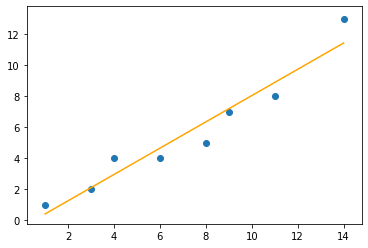

In [97]:
x = party["invited"]
y = party["attended"]

lin_reg = stats.linregress(x,y)
print("linear regression:", lin_reg)
print("\n")

regression_line = lin_reg.intercept + lin_reg.slope*x 
print(regression_line)

rsquared = lin_reg.rvalue**2
print("\nrsquared:", rsquared)

plt.plot(x, regression_line, c="orange")
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# there's a high positive correlation between the 2 variables
# R^2 shows that about 93% data fits in the regression

# So, has we invite more people, more seems not to show up

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

linear regression: LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)


0    0.409091
1    2.106061
2    2.954545
3    4.651515
4    6.348485
5    7.196970
6    8.893939
Name: invited, dtype: float64

rsquared: 0.9433811802232854


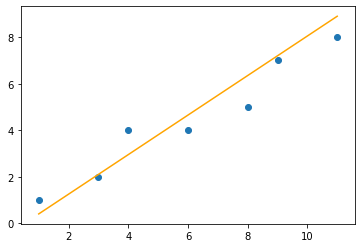

IQR:
 invited     5.0
attended    3.0
dtype: float64

party_outliers:
    invited  attended
0    False     False
1    False     False
2    False     False
3    False     False
4    False     False
5    False     False
6    False     False

There's no outliers


In [98]:
party = party[:-1]

x = party["invited"]
y = party["attended"]

lin_reg = stats.linregress(x,y)
print("linear regression:", lin_reg)
print("\n")

regression_line = results.intercept + results.slope*x
print(regression_line)

rsquared = lin_reg.rvalue**2
print("\nrsquared:", rsquared)



plt.plot(x, regression_line, c="orange")
plt.scatter(x,y)
plt.show()



# see if there's any outliers
q1 = party.quantile(0.25)
q3 = party.quantile(0.75)
iqr = q3 - q1
print("IQR:\n",iqr)

party_outliers = (party < (Q1-1.5 * IQR))|(party > (Q3+1.5 * IQR))
print("\nparty_outliers:\n", party_outliers)

print("\nThere's no outliers")


# Apparently, it was some outliers i think lol (R^2 is a little bit better now)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# without some outliers, the correlation is even stronger 